In [1]:
# Example usage:
# m, f = convert_simple_to_problem_format("path/to/simple_format_file.txt")
# selected_facilities, total_cost = solve_pyomo(m, f)
# m, f = convert_orlib_cap_to_problem_format("/Users/krupke/Repositories/HardProblemBench/tasks/facility_location/CLSC/3133GapCS.txt")
# m,f

In [2]:
from algbench import Benchmark, read_as_pandas

benchmark = Benchmark("./.data", hide_output=False)

In [3]:
t = read_as_pandas(
    "./.data",
    lambda x: {
        "instance_name": x["parameters"]["args"]["instance_name"],
        "model": x["parameters"]["args"]["model"],
        "time": x["runtime"],
        "objective": x["result"]["objective"],
        "bound": x["result"]["bound"],
    },
)
t

,instance_name,model,time,objective,bound
0,KoerkelGhosh-asym/500/b/ga500b-4,solve1,33.249497,559202,531859
1,KoerkelGhosh-asym/500/b/ga500b-4,solve2,32.421462,559103,531882
2,KoerkelGhosh-asym/500/b/ga500b-4,solve3,32.132297,562834,531884
3,KoerkelGhosh-asym/500/b/ga500b-5,solve1,33.250591,560911,532094
4,KoerkelGhosh-asym/500/b/ga500b-5,solve2,32.188633,564773,531917
...,...,...,...,...,...
130,KoerkelGhosh-asym/750/b/ga750b-3,solve2,35.112618,1138903,786955
131,KoerkelGhosh-asym/750/b/ga750b-3,solve3,35.116273,1043070,786955
132,KoerkelGhosh-asym/750/c/ga750c-1,solve1,36.721125,1248509,796492
133,KoerkelGhosh-asym/750/c/ga750c-1,solve2,34.899835,2585201,793059


In [4]:
benchmark.front()

{'result': {'objective': 559202, 'bound': 531859},
 'timestamp': '2025-06-04T19:11:55.744286',
 'runtime': 33.249497413635254,
 'stdout': [],
 'stderr': [],
 'logging': [],
 'env_fingerprint': '5de30a459f30cb188ccface596923cf8eb699f7c',
 'args_fingerprint': '053b454327e9f96c592d5b0c974443a673e7def7',
 'parameters': {'func': 'solve',
  'args': {'instance_name': 'KoerkelGhosh-asym/500/b/ga500b-4',
   'model': 'solve1',
   'time_limit': 30,
   'instance_': "instance_uid='KoerkelGhosh-asym/500/b/ga500b-4' origin='https://resources.mpi-inf.mpg.de/departments/d1/projects/benchmarks/UflLib/data/bench/KoerkelGhosh-asym.tbz2' comment='' num_clients=500 num_facilities=500 is_integral=True opening_cost=[1606, 1633, 1174, 1171, 1960, 1454, 1160, 1538, 1709, 1515, 1725, 1748, 1271, 1848, 1227, 1942, 1410, 1072, 1283, 1181, 1965, 1840, 1759, 1147, 1293, 1829, 1673, 1020, 1947, 1172, 1775, 1693, 1613, 1748, 1110, 1990, 1860, 1231, 1325, 1023, 1706, 1305, 1011, 1361, 1555, 1947, 1866, 1163, 1523, 1198

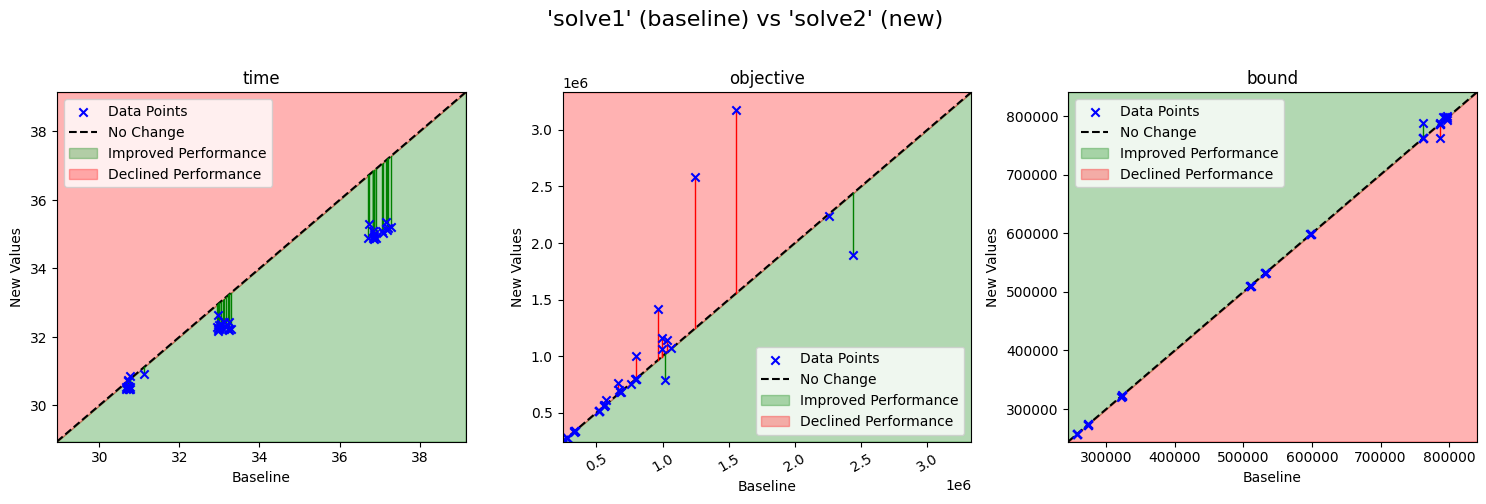

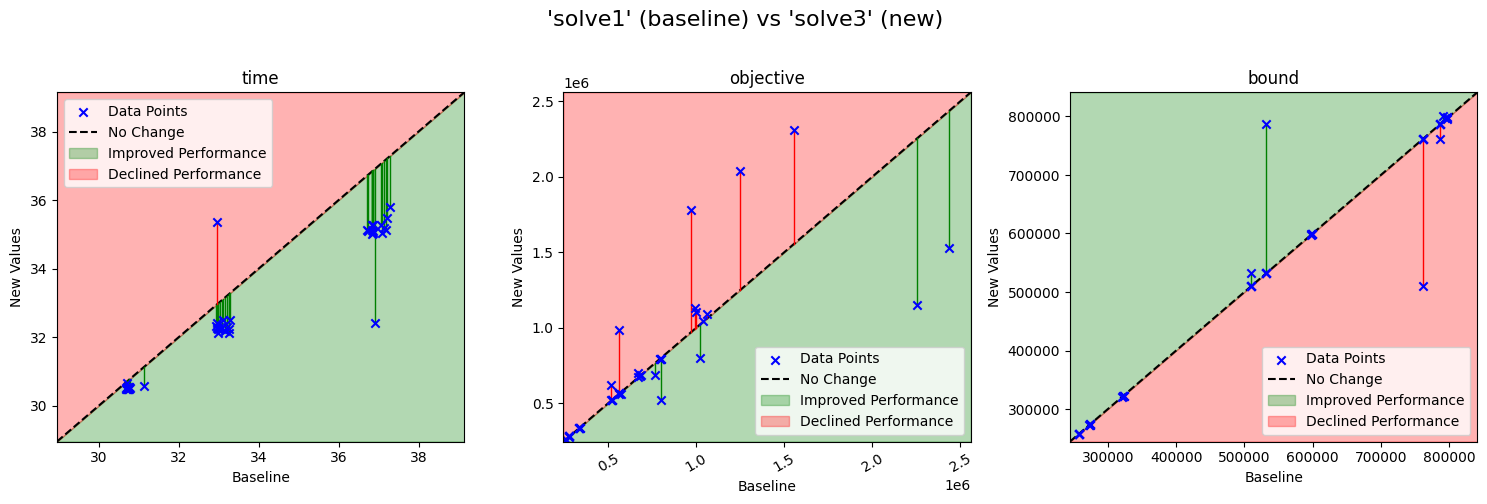

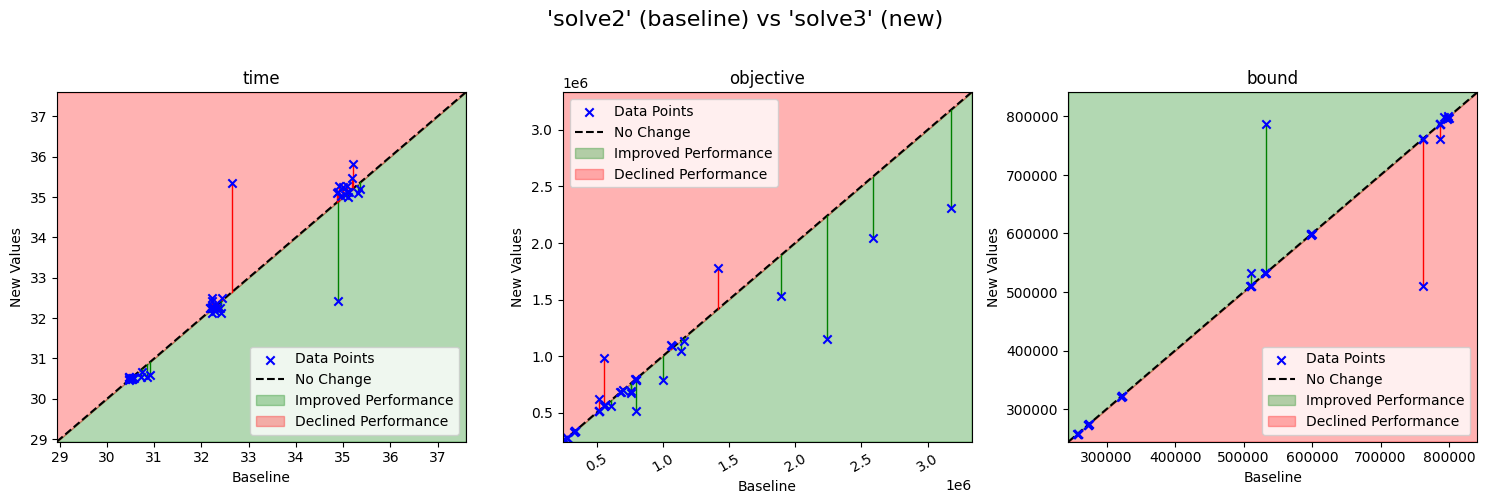

In [8]:
from scatter_with_performance_zones import plot_comparison_grid

import itertools

for baseline, new in itertools.combinations(t["model"].unique(), 2):
    if new not in t["model"].unique():
        print(f"Skipping {new} as it is not present in the results.")
        continue

    A = t[t["model"] == baseline].set_index("instance_name")
    B = t[t["model"] == new].set_index("instance_name")

    fig, axes = plot_comparison_grid(
        baseline_data=A,
        new_data=B,
        metrics=[("time", "min"), ("objective", "min"), ("bound", "max")],
        suptitle=f"'{baseline}' (baseline) vs '{new}' (new)",
    )
    # rotate the second plot's x-axis labels for better readability
    axes[1].tick_params(axis="x", rotation=30)

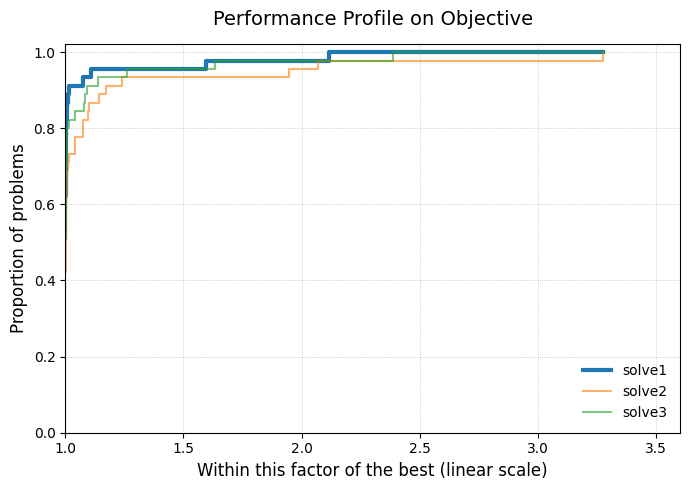

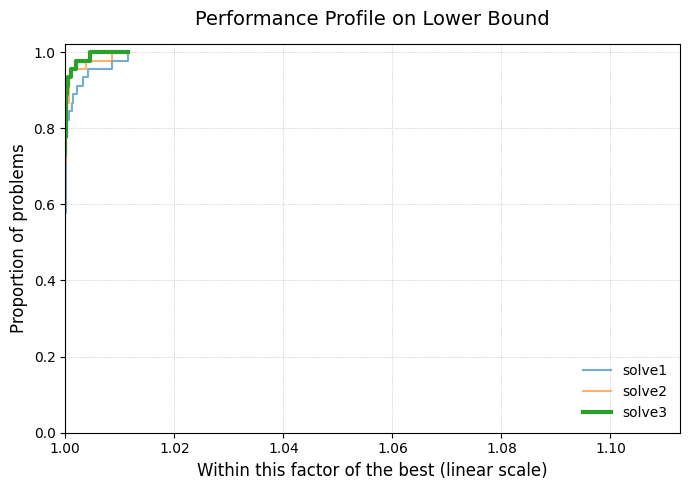

In [6]:
from performance_profile import plot_performance_profile
import matplotlib.pyplot as plt
# Example usage:
# ax = plot_performance(
#     results,
#     instance_column="instance_name",
#     strategy_column="strategy",
#     metric_column="objective",
#     direction="min",
#     title="Performance Profile on Objective"
# )
# plt.show()

ax = plt.figure(figsize=(7, 5)).gca()
plot_performance_profile(
    t,
    instance_column="instance_name",
    strategy_column="model",
    metric_column="objective",
    direction="min",
    highlight_best=True,
    ax=ax,
    title="Performance Profile on Objective",
)
plt.show()

# lower bound profile
ax = plt.figure(figsize=(7, 5)).gca()
plot_performance_profile(
    t,
    instance_column="instance_name",
    strategy_column="model",
    metric_column="bound",
    direction="max",
    highlight_best=True,
    ax=ax,
    title="Performance Profile on Lower Bound",
)
plt.show()